# Feature Selection Experimentation

In [28]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import sklearn
from sklearn.preprocessing import LabelEncoder
import scipy.stats as stats
from sklearn.model_selection import train_test_split
import feature_engine.transformation as vt
from sklearn.linear_model import LinearRegression, Ridge, Lasso
from sklearn.tree import DecisionTreeRegressor
from sklearn.metrics import r2_score, mean_absolute_error, mean_squared_error
from sklearn.model_selection import RandomizedSearchCV
from catboost import CatBoostRegressor
from xgboost import XGBRegressor
from sklearn.ensemble import RandomForestRegressor, AdaBoostRegressor

# the scaler - for min-max scaling
from sklearn.preprocessing import MinMaxScaler

In [29]:
df = pd.read_csv('data/fifa_final.csv')

In [30]:
df = df.drop(['work_rate', 'team_position'], axis=1)

In [31]:
df.shape

(18944, 49)

In [ ]:
# How do we check duplicate columns ?

In [32]:
X = df.drop(columns=['overall'], axis=1)
y = df['overall']

In [33]:
X.columns

Index(['age', 'height_cm', 'weight_kg', 'potential', 'value_eur', 'wage_eur',
       'preferred_foot', 'weak_foot', 'skill_moves', 'attacking_crossing',
       'attacking_finishing', 'attacking_heading_accuracy',
       'attacking_short_passing', 'attacking_volleys', 'skill_dribbling',
       'skill_curve', 'skill_fk_accuracy', 'skill_long_passing',
       'skill_ball_control', 'movement_acceleration', 'movement_sprint_speed',
       'movement_agility', 'movement_reactions', 'movement_balance',
       'power_shot_power', 'power_jumping', 'power_stamina', 'power_strength',
       'power_long_shots', 'mentality_aggression', 'mentality_interceptions',
       'mentality_positioning', 'mentality_vision', 'mentality_penalties',
       'mentality_composure', 'defending_standing_tackle',
       'defending_sliding_tackle', 'goalkeeping_diving',
       'goalkeeping_handling', 'goalkeeping_kicking',
       'goalkeeping_positioning', 'goalkeeping_reflexes', 'pace_median',
       'shooting_median',

In [34]:
df.shape

(18944, 49)

In [35]:
from sklearn.feature_selection import SelectKBest
from sklearn.feature_selection import chi2

In [38]:
# Univariate Selection
# Apply select kbest algorithm
oredered_rank_features = SelectKBest(score_func=chi2, k=48)
ordered_features = oredered_rank_features.fit(X,y)

In [39]:
ordered_features

SelectKBest(k=48, score_func=<function chi2 at 0x0000025360268700>)

In [44]:
dfscores = pd.DataFrame(ordered_features.scores_, columns=["Score"])
dfcolumns = pd.DataFrame(X.columns)

In [45]:
features_rank = pd.concat([dfcolumns, dfscores], axis=1)

In [47]:
features_rank.columns=['Features','Score']
features_rank

,Features,Score
0,age,4.216163e+03
1,height_cm,2.239493e+01
2,weight_kg,3.204829e+02
3,potential,4.488697e+03
4,value_eur,1.997368e+11
5,wage_eur,6.332645e+08
6,preferred_foot,2.592703e+01
7,weak_foot,1.500582e+02
8,skill_moves,7.101958e+02
9,attacking_crossing,2.182039e+04


In [49]:
# Sort the rankings 
features_rank.nlargest(47,'Score')

,Features,Score
4,value_eur,1.997368e+11
5,wage_eur,6.332645e+08
28,power_long_shots,2.561273e+04
15,skill_curve,2.408092e+04
34,mentality_composure,2.402766e+04
9,attacking_crossing,2.182039e+04
16,skill_fk_accuracy,2.030563e+04
17,skill_long_passing,2.003277e+04
13,attacking_volleys,1.974020e+04
22,movement_reactions,1.927211e+04


# 2. Feature Importance

In [51]:
from sklearn.ensemble import ExtraTreesClassifier

In [52]:
model = ExtraTreesClassifier()
model.fit(X,y)

ExtraTreesClassifier()

In [53]:
print(model.feature_importances_)

[0.02607249 0.0164304  0.0166156  0.04651903 0.06512134 0.02366529
 0.01029314 0.01323337 0.00836142 0.02110027 0.0193279  0.02012574
 0.02188748 0.01757045 0.02114334 0.01760374 0.01694948 0.01836173
 0.02568754 0.01774904 0.01796718 0.01689291 0.02998678 0.01641371
 0.01950778 0.01740386 0.01931584 0.0180425  0.01827403 0.01899594
 0.02318821 0.0215565  0.01848902 0.01687927 0.02182289 0.02295113
 0.02235028 0.02015358 0.01937364 0.01789142 0.02041746 0.01997336
 0.0161527  0.01864993 0.01909205 0.02069603 0.02561678 0.01812643]


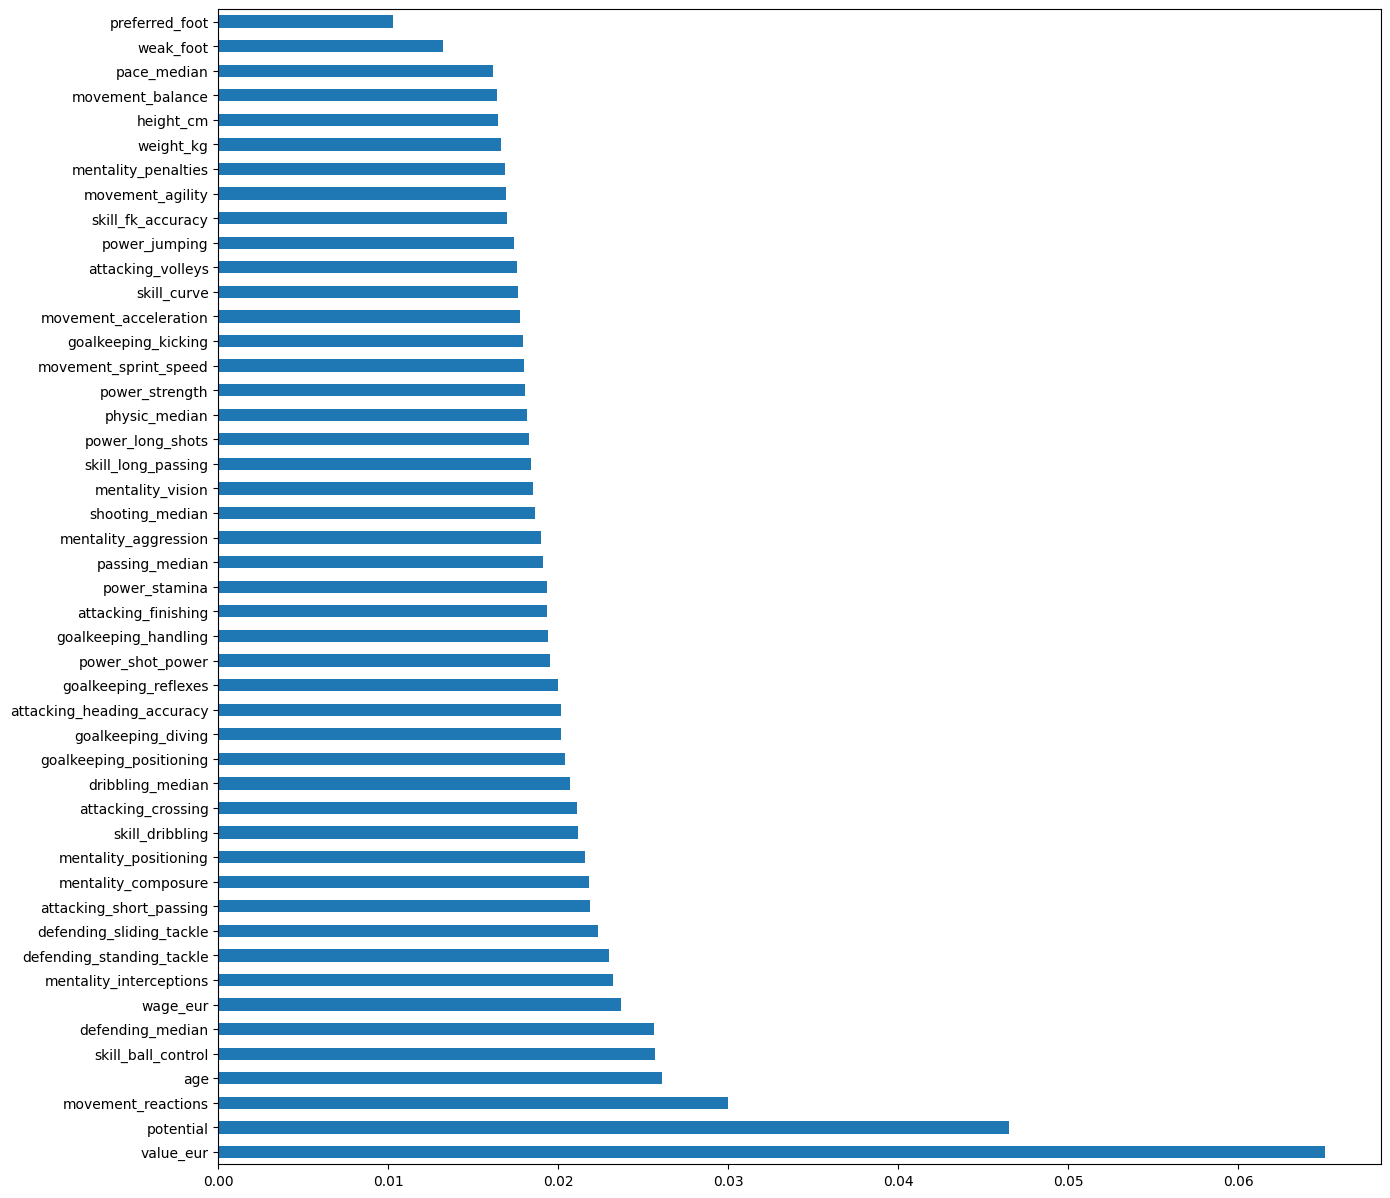

In [60]:
ranked_features = pd.Series(model.feature_importances_, index=X.columns)
plt.figure(figsize=(15, 15))
ranked_features.nlargest(47).plot(kind='barh')
plt.show()

# 3.Correlation 

In [62]:
pd.set_option('display.max_columns', None)
df.corr()

,age,height_cm,weight_kg,overall,potential,value_eur,wage_eur,preferred_foot,weak_foot,skill_moves,attacking_crossing,attacking_finishing,attacking_heading_accuracy,attacking_short_passing,attacking_volleys,skill_dribbling,skill_curve,skill_fk_accuracy,skill_long_passing,skill_ball_control,movement_acceleration,movement_sprint_speed,movement_agility,movement_reactions,movement_balance,power_shot_power,power_jumping,power_stamina,power_strength,power_long_shots,mentality_aggression,mentality_interceptions,mentality_positioning,mentality_vision,mentality_penalties,mentality_composure,defending_standing_tackle,defending_sliding_tackle,goalkeeping_diving,goalkeeping_handling,goalkeeping_kicking,goalkeeping_positioning,goalkeeping_reflexes,pace_median,shooting_median,passing_median,dribbling_median,defending_median,physic_median
age,1.000000,0.089297,0.240207,0.468197,-0.262195,0.084973,0.157284,-0.000494,0.073720,0.063210,0.127915,0.082528,0.148629,0.147002,0.139521,0.027099,0.141459,0.182622,0.188678,0.094226,-0.136920,-0.130693,-0.008175,0.456416,-0.075240,0.267956,0.202541,0.121206,0.350908,0.156099,0.248075,0.187173,0.096431,0.198810,0.137647,0.361039,0.107215,0.091344,0.114229,0.115113,0.115437,0.127366,0.114511,-0.167434,0.225124,0.314289,0.172194,0.240325,0.408172
height_cm,0.089297,1.000000,0.772994,0.031579,-0.011113,0.004124,0.022356,0.076216,-0.165546,-0.419541,-0.487854,-0.371722,0.012558,-0.353814,-0.343877,-0.479083,-0.438664,-0.402411,-0.318615,-0.410529,-0.542787,-0.459585,-0.612886,-0.001273,-0.765173,-0.158181,-0.002795,-0.283207,0.529385,-0.379300,-0.044984,-0.058819,-0.437973,-0.363138,-0.321531,-0.155509,-0.074029,-0.080023,0.364616,0.364247,0.361553,0.364459,0.365283,-0.366087,-0.160173,-0.236989,-0.325106,0.222950,0.460912
weight_kg,0.240207,0.772994,1.000000,0.146242,-0.023860,0.044710,0.061504,0.073632,-0.124738,-0.345576,-0.396089,-0.285088,0.046464,-0.272932,-0.255274,-0.398262,-0.346571,-0.309706,-0.244427,-0.328242,-0.479549,-0.404441,-0.529090,0.104062,-0.651620,-0.044319,0.066759,-0.216600,0.613307,-0.275807,0.026546,-0.035321,-0.347661,-0.273707,-0.234966,-0.056999,-0.060898,-0.070055,0.336193,0.337702,0.334096,0.340705,0.337655,-0.326652,-0.066077,-0.144429,-0.232268,0.217326,0.536217
overall,0.468197,0.031579,0.146242,1.000000,0.636366,0.630085,0.574230,-0.052533,0.222814,0.381369,0.410530,0.325413,0.327239,0.502191,0.374330,0.378455,0.420495,0.385617,0.487147,0.449372,0.206962,0.215745,0.279889,0.867234,0.128349,0.558372,0.282440,0.381869,0.358049,0.407525,0.401920,0.320162,0.354239,0.509087,0.328198,0.705252,0.260325,0.232392,0.003128,0.003454,-0.000512,0.012274,0.004052,0.188292,0.451726,0.660281,0.592937,0.326858,0.489933
potential,-0.262195,-0.011113,-0.023860,0.636366,1.000000,0.571925,0.474696,-0.042586,0.161616,0.297293,0.257515,0.217648,0.179781,0.351071,0.230763,0.308379,0.277232,0.215330,0.314737,0.332585,0.240037,0.240678,0.236697,0.512926,0.155215,0.336309,0.113711,0.208670,0.065667,0.243391,0.190117,0.158788,0.229676,0.339285,0.196769,0.425953,0.158619,0.145028,-0.035177,-0.034622,-0.039857,-0.033219,-0.034552,0.254110,0.265718,0.409421,0.445002,0.156834,0.148672
value_eur,0.084973,0.004124,0.044710,0.630085,0.571925,1.000000,0.840126,-0.023226,0.162842,0.293722,0.260727,0.242152,0.182118,0.329672,0.270210,0.269241,0.290695,0.251080,0.311820,0.300466,0.177953,0.182194,0.200203,0.558071,0.129541,0.354212,0.141240,0.226477,0.145137,0.268849,0.204890,0.157886,0.253831,0.366410,0.222884,0.447076,0.131715,0.111672,-0.012059,-0.010816,-0.012853,-0.009644,-0.010512,0.192452,0.321130,0.437826,0.421479,0.157382,0.233776
wage_eur,0.157284,0.022356,0.061504,0.574230,0.474696,0.840126,1.000000,-0.020555,0.150773,0.265846,0.247769,0.218520,0.195446,0.309384,0.255626,0.245966,0.274989,0.241669,0.298604,0.281953,0.132122,0.135378,0.166320,0.512741,0.105877,0.334018,0.143924,0.196167,0.150567,0.250951,0.216048,0.168514,0.234889,0.335178,0.221636,0.424969,0.141823,0.122778,-0.019757,-0.019940,-0.0212

<Axes: >

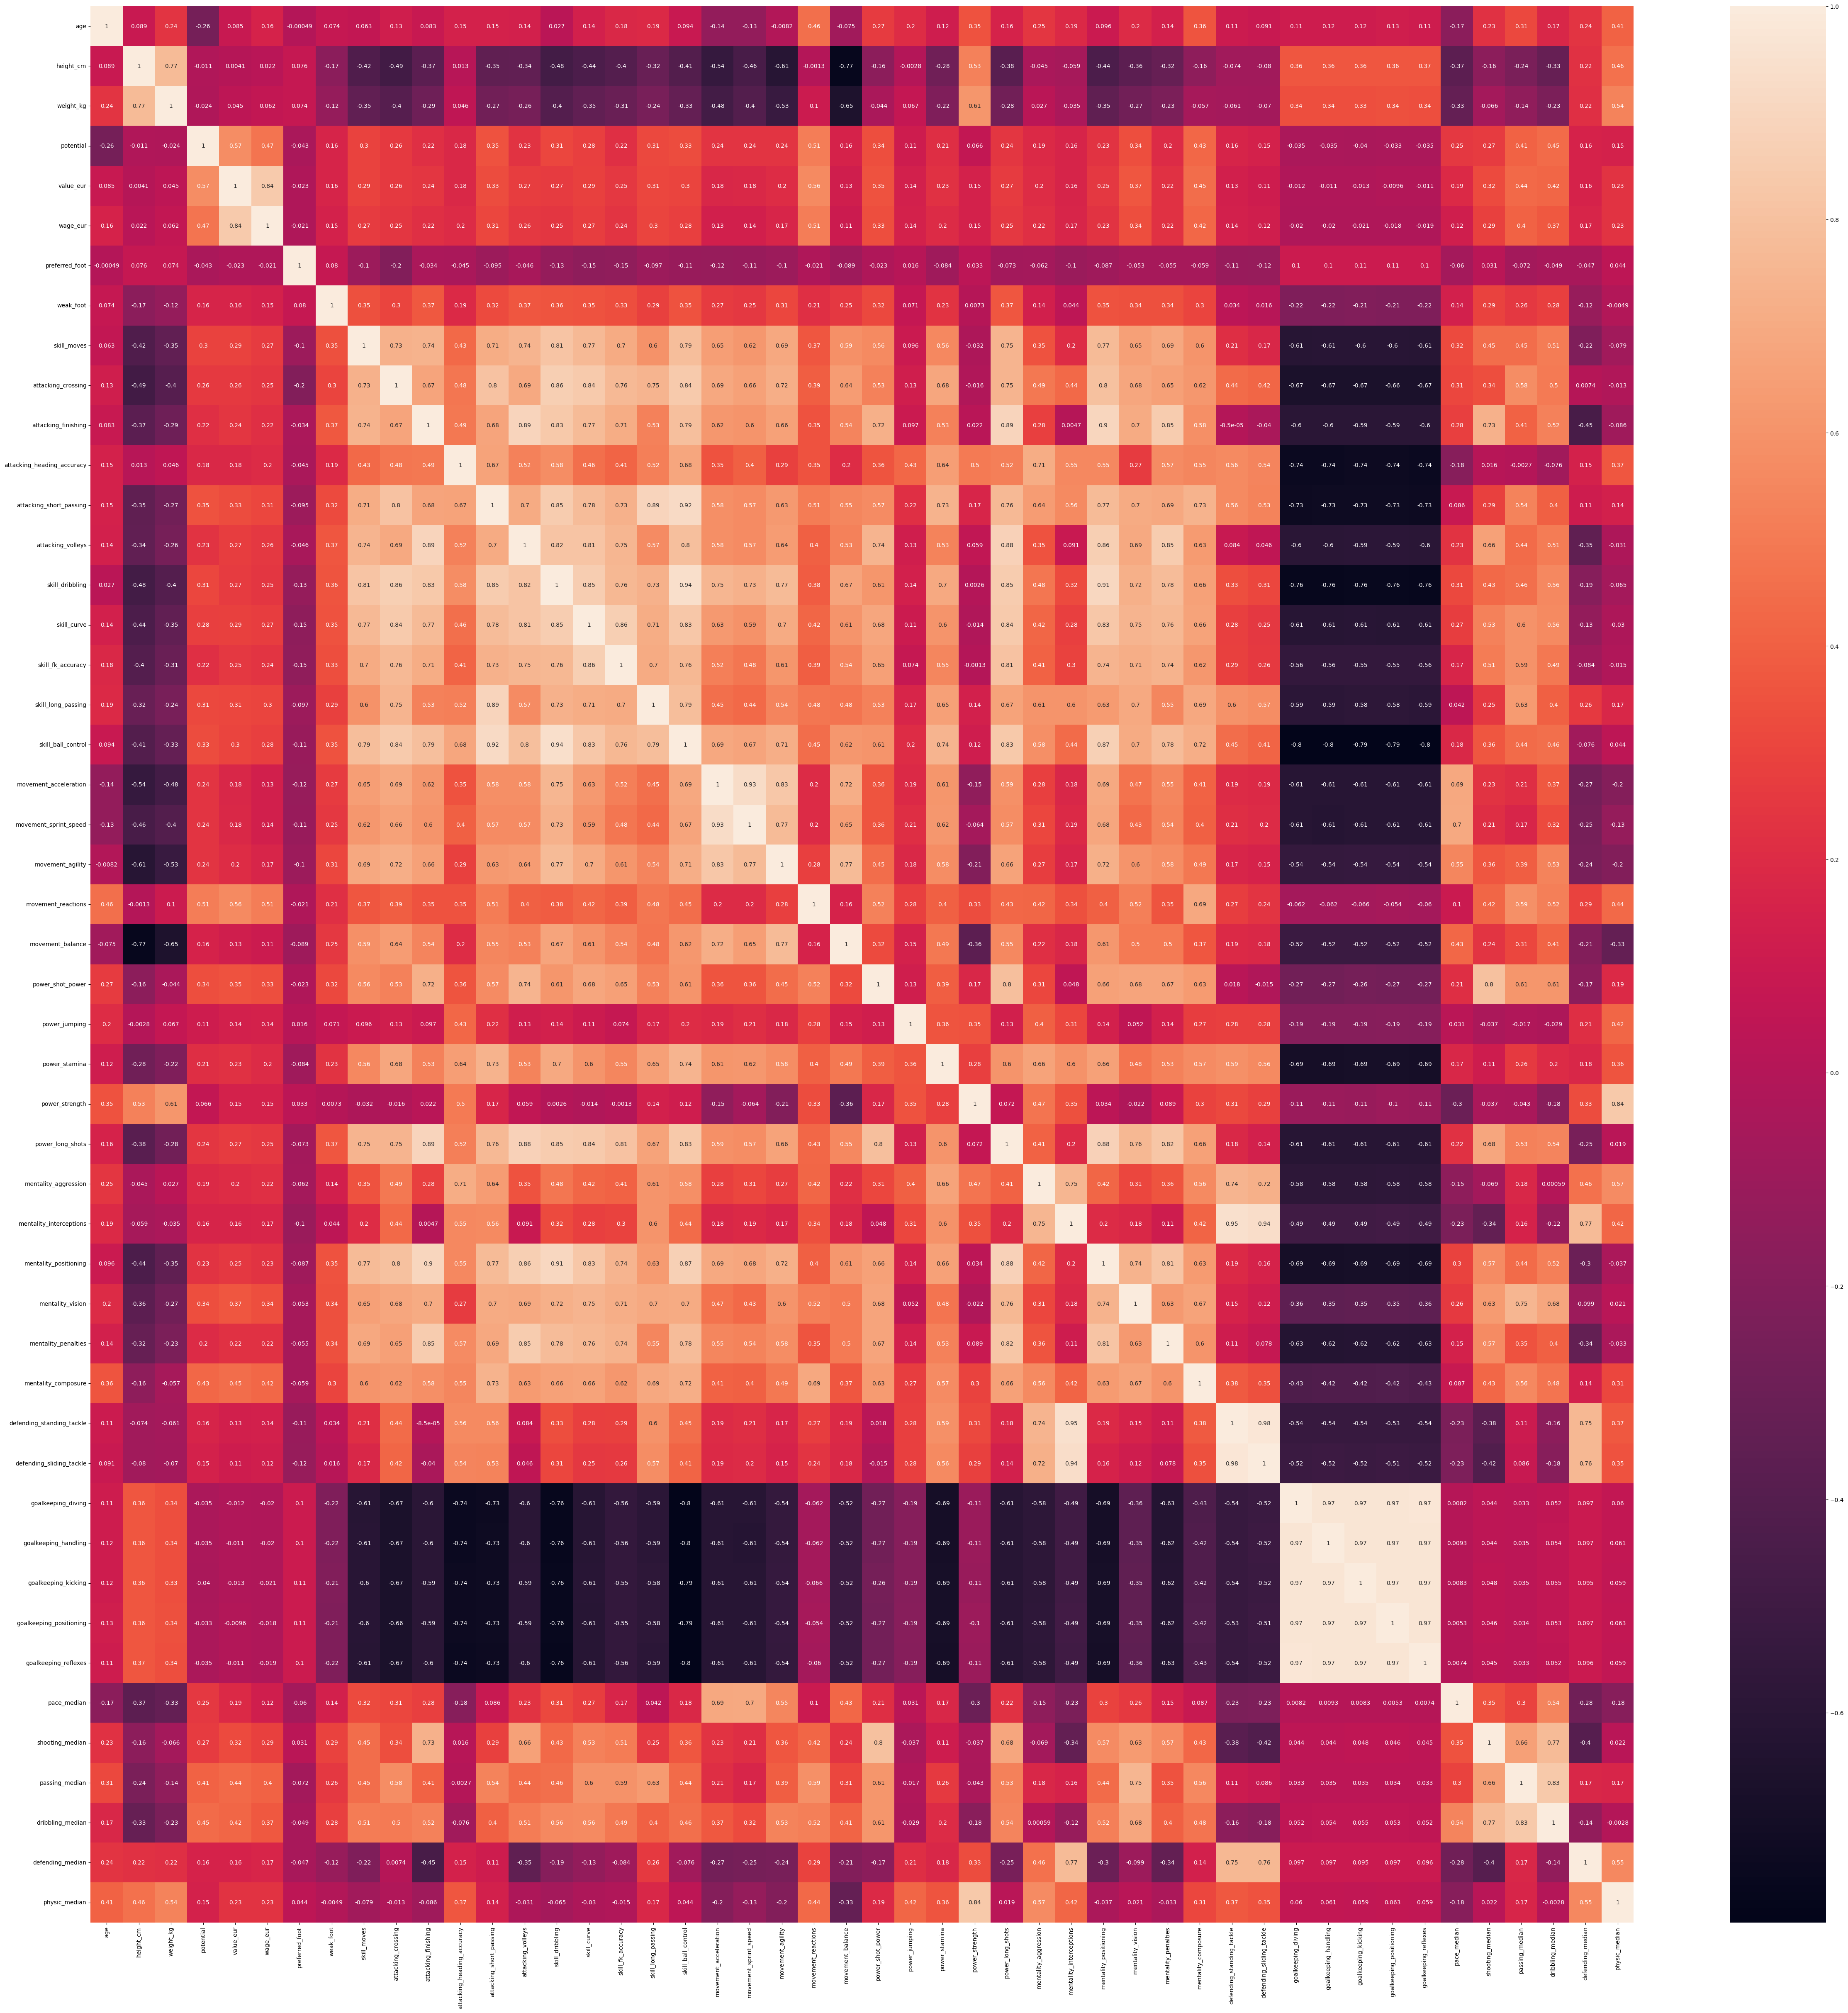

In [67]:
corr = df.drop(columns=['overall'], axis=1).corr()
top_features = corr.index
plt.figure(figsize=(60,60))
sns.heatmap(df[top_features].corr(), annot=True)

In [71]:
# remove the correlated features. remove features with respect to independent feature.
# we will make a list of features which has to be removed from the dataset.
# for this we will create a function, based on the threshold value we will delete the features.


def correlation(dataset, threshold):
    col_corr = set()
    corr_matrix = dataset.corr()
    for i in range(len(corr_matrix.columns)):
        for j in range(i):
            if abs(corr_matrix.iloc[i,j]) > threshold:
                colname = corr_matrix.columns[i]
                col_corr.add(colname)
    return col_corr

In [80]:
threshold = 0.7
correlation(df.drop(columns=['overall'], axis=1), threshold)

{'attacking_crossing',
 'attacking_finishing',
 'attacking_short_passing',
 'attacking_volleys',
 'defending_median',
 'defending_sliding_tackle',
 'defending_standing_tackle',
 'dribbling_median',
 'goalkeeping_diving',
 'goalkeeping_handling',
 'goalkeeping_kicking',
 'goalkeeping_positioning',
 'goalkeeping_reflexes',
 'mentality_aggression',
 'mentality_composure',
 'mentality_interceptions',
 'mentality_penalties',
 'mentality_positioning',
 'mentality_vision',
 'movement_acceleration',
 'movement_agility',
 'movement_balance',
 'movement_sprint_speed',
 'passing_median',
 'physic_median',
 'power_long_shots',
 'power_shot_power',
 'power_stamina',
 'shooting_median',
 'skill_ball_control',
 'skill_curve',
 'skill_dribbling',
 'skill_fk_accuracy',
 'skill_long_passing',
 'wage_eur',
 'weight_kg'}

In [78]:
# Drop potential too from the dataset

# 4.Information Gain

In [81]:
from sklearn.feature_selection import mutual_info_classif

In [83]:
mutual_info = mutual_info_classif(X,y)

In [85]:
mutual_data = pd.Series(mutual_info,index=X.columns)
mutual_data.sort_values(ascending=False)

value_eur                     1.457241
potential                     0.854209
movement_reactions            0.764190
wage_eur                      0.647761
skill_ball_control            0.499794
mentality_composure           0.462578
attacking_short_passing       0.421895
defending_median              0.396212
dribbling_median              0.388250
passing_median                0.375265
mentality_interceptions       0.341736
skill_dribbling               0.337515
defending_standing_tackle     0.312195
mentality_positioning         0.297524
attacking_crossing            0.284326
defending_sliding_tackle      0.279724
mentality_vision              0.256842
power_shot_power              0.251939
shooting_median               0.247334
power_long_shots              0.242783
skill_long_passing            0.238832
skill_curve                   0.201034
age                           0.190313
attacking_volleys             0.175235
physic_median                 0.165125
attacking_finishing      

# 5. Correlation with the Target variable

In [89]:
absCorrWithDep = []
for var in X:
    absCorrWithDep.append(abs(y.corr(X[var])))

In [93]:
absCorr_data = pd.Series(absCorrWithDep,index=X.columns)
absCorr_data.sort_values(ascending=False)

movement_reactions            0.867234
mentality_composure           0.705252
passing_median                0.660281
potential                     0.636366
value_eur                     0.630085
dribbling_median              0.592937
wage_eur                      0.574230
power_shot_power              0.558372
mentality_vision              0.509087
attacking_short_passing       0.502191
physic_median                 0.489933
skill_long_passing            0.487147
age                           0.468197
shooting_median               0.451726
skill_ball_control            0.449372
skill_curve                   0.420495
attacking_crossing            0.410530
power_long_shots              0.407525
mentality_aggression          0.401920
skill_fk_accuracy             0.385617
power_stamina                 0.381869
skill_moves                   0.381369
skill_dribbling               0.378455
attacking_volleys             0.374330
power_strength                0.358049
mentality_positioning    